In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import torch

import FullRankRNN as rnn
import Reinforce as rln

In [3]:
net = rnn.FullRankRNN(input_size=3, hidden_size=128, output_size=3,
                      noise_std=0, alpha=0.2, rho=0.8,
                      train_wi=True, train_wo=True)

net.actor_critic(actor=True)

net.load_state_dict(torch.load("models/FullRankRNN.pt", map_location='cpu'))

<All keys matched successfully>

In [4]:
task = "RDM"
inputs_valid = torch.load("artificial dataset/"+task+'_inputs_valid.pt')
values_valid = torch.load("artificial dataset/"+task+'_values_valid.pt')
traj = torch.load("artificial dataset/"+task+'traj.pt')

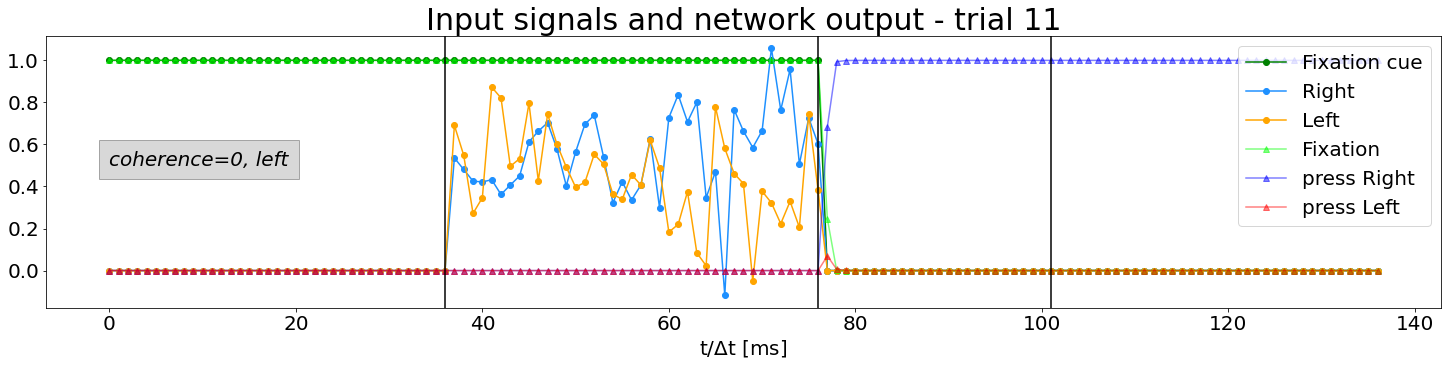

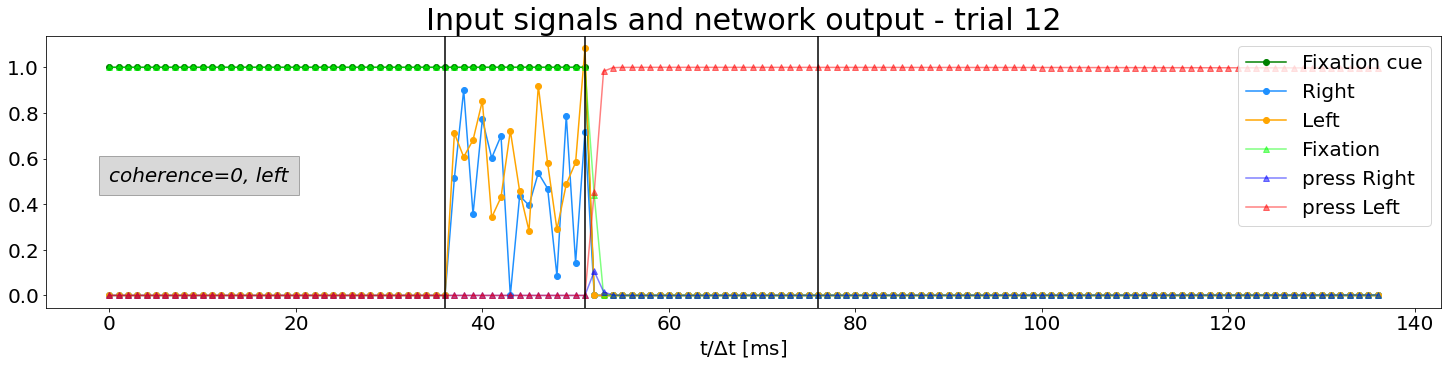

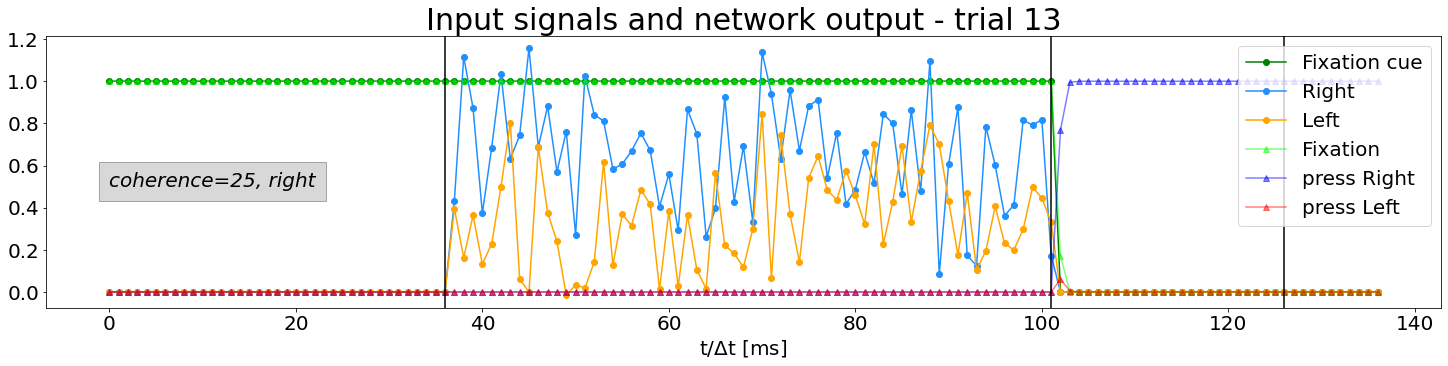

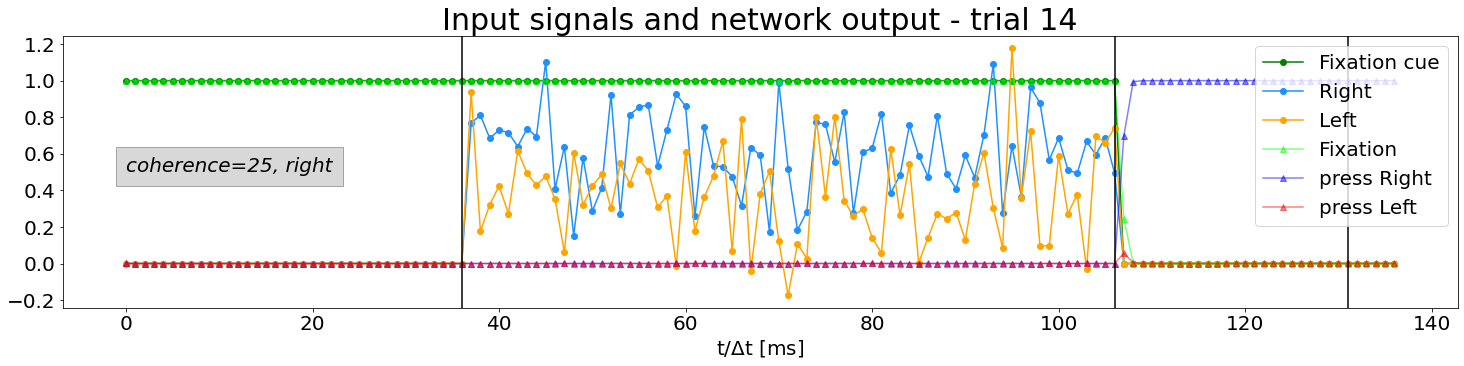

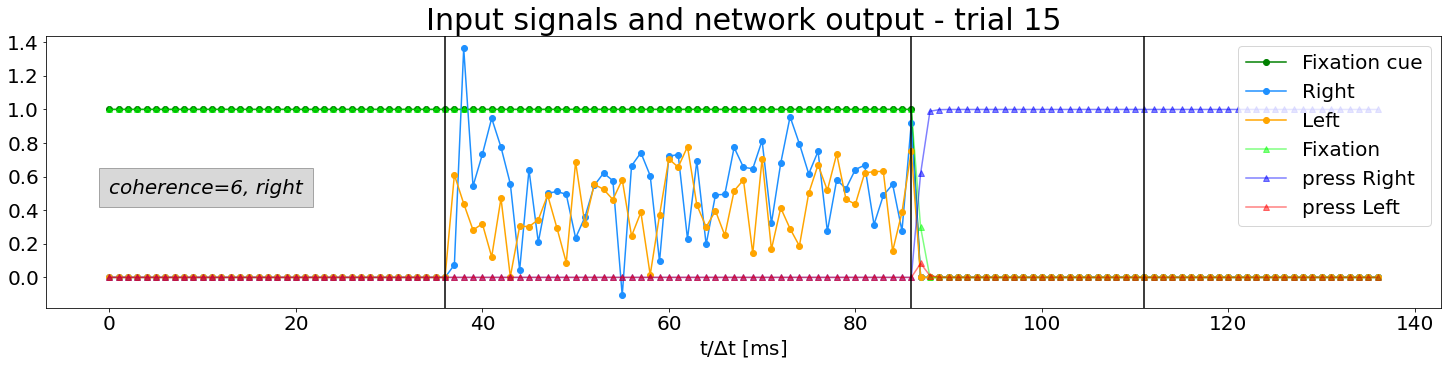

In [6]:
output_valid = net(inputs_valid, return_dynamics = False)#, h0=traj[0][0])
    
for i in range(5):
    plt.figure(figsize=(25,5))
    i=i+10
    
    plt.plot(inputs_valid[i,:,0], "-o", label="Fixation cue", color="green")
    plt.plot(inputs_valid[i,:,1], "-o", label="Right", color="dodgerblue")
    plt.plot(inputs_valid[i,:,2], "-o", label="Left", color="orange")
    plt.plot(output_valid[i,:,0].detach().numpy(), "-^", label="Fixation", color="lime", alpha=0.5)
    plt.plot(output_valid[i,:,1].detach().numpy(), "-^", label="press Right", color="blue", alpha=0.5)
    plt.plot(output_valid[i,:,2].detach().numpy(), "-^", label="press Left", color="red", alpha=0.5)
    
    plt.axvline(values_valid[i][1]-1, color="black")
    plt.axvline(values_valid[i][2]-1, color="black")
    plt.axvline(values_valid[i][3]-1, color="black")
    
    plt.xlabel('t/$\Delta$t [ms]', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.text(0, 0.5, r'coherence=%i, %s' %(values_valid[i][0], values_valid[i][4]), style='italic', fontsize=20, bbox={'facecolor': 'grey', 'alpha': 0.3, 'pad': 10})
    plt.legend(fontsize=20, loc="upper right")
    plt.title("Input signals and network output - trial %i" %(i+1), fontsize=30)

In [7]:
reinforce = rln.REINFORCE()

In [11]:
obs, rewards, actions, probs, log_probs, values, trial_begins, gt = reinforce.experience(10, "models/FullRankRNN.pt")

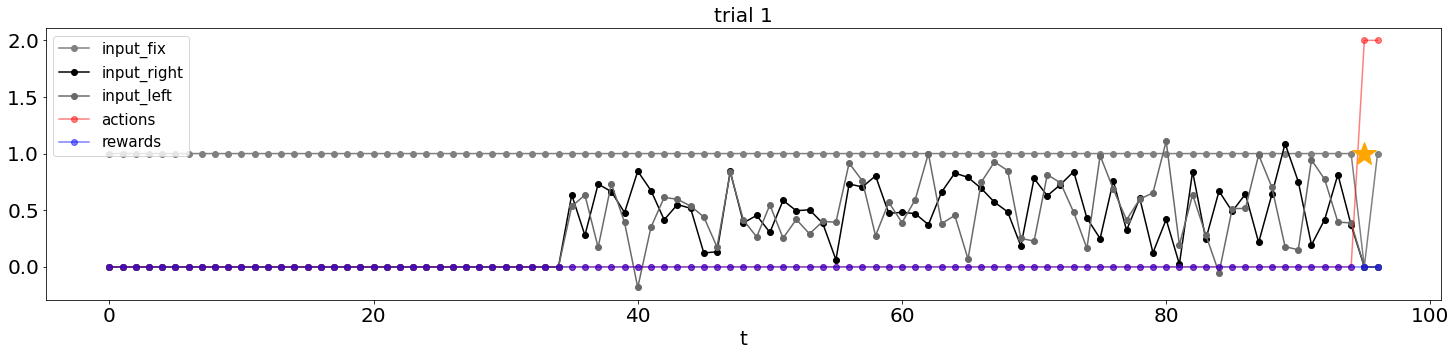

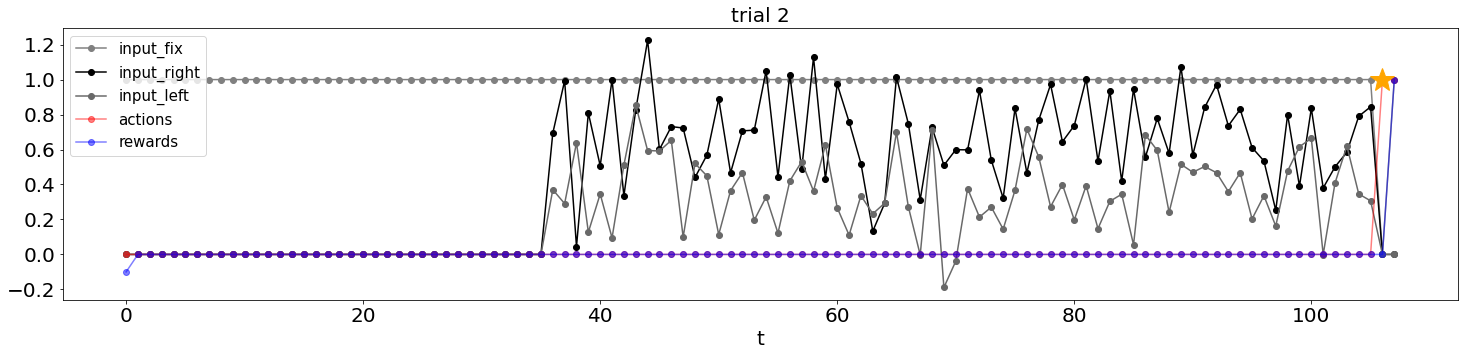

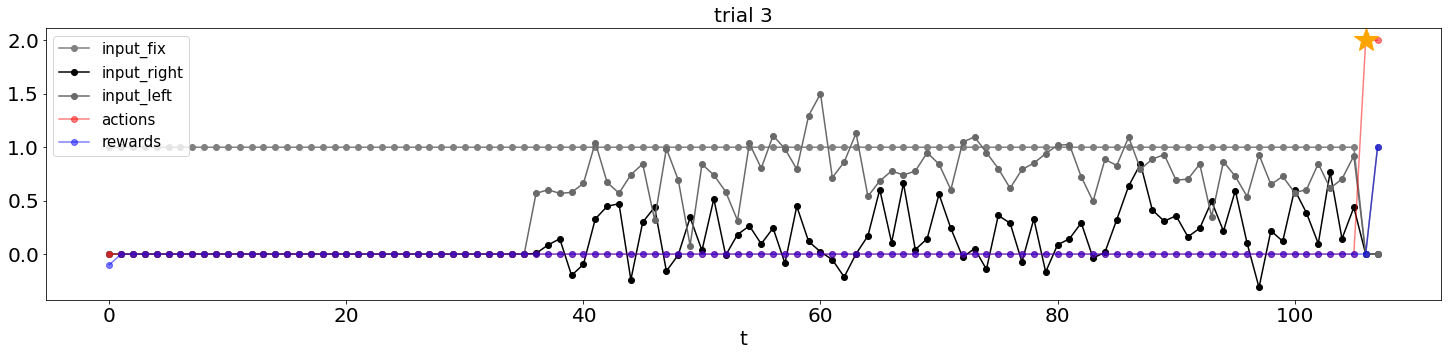

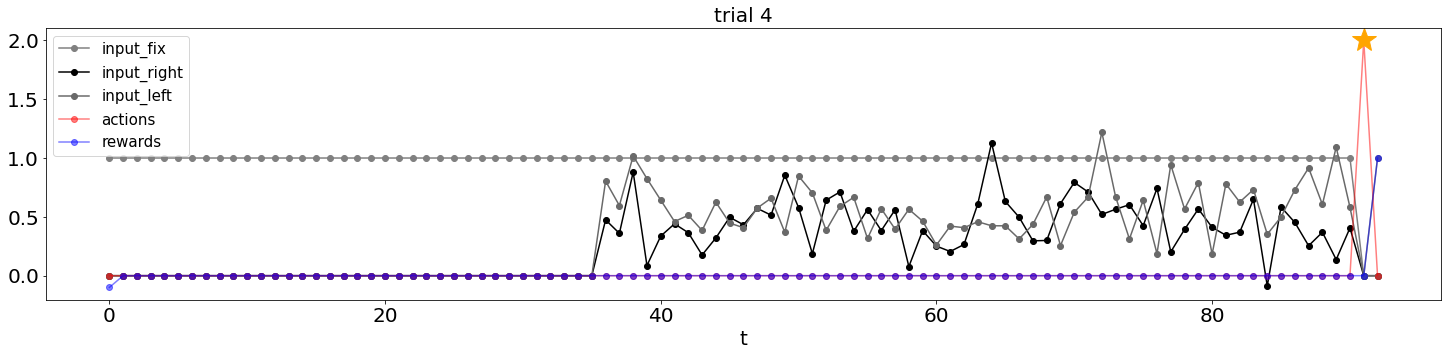

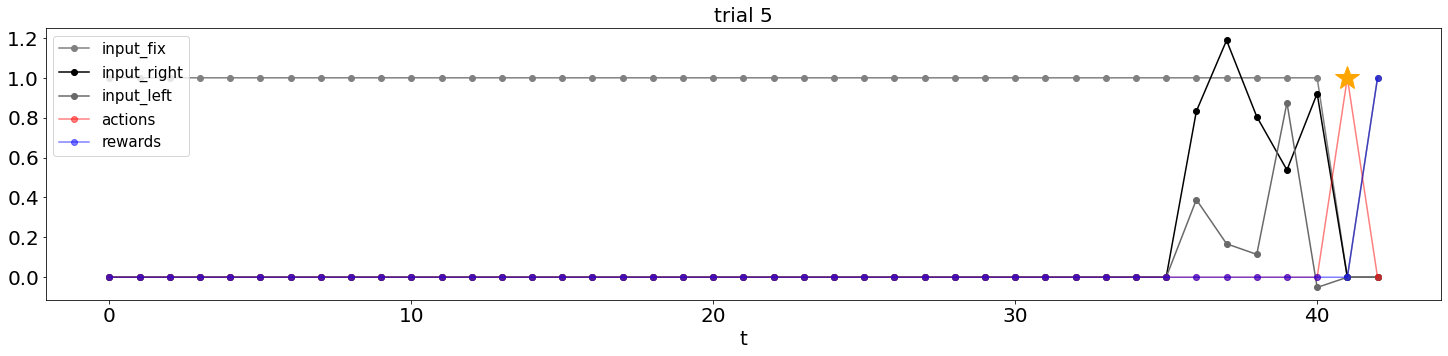

In [12]:
obs = obs.T
length = 0
for i in range(5):

    plt.figure(figsize=(25,5))
    
    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])
     
    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.legend(fontsize=15, loc="upper left");

In [13]:
#torch.autograd.set_detect_anomaly(True)
reinforce.training(5, 5, "models/FullRankRNN.pt")

It took 13.787425s for 5 iterations

It took 2.709908s on average for each 5-trails iteration


[tensor(1.8781, grad_fn=<MeanBackward1>),
 tensor(7.4929, grad_fn=<MeanBackward1>),
 tensor(7.9258, grad_fn=<MeanBackward1>),
 tensor(8.6368, grad_fn=<MeanBackward1>),
 tensor(2.4081, grad_fn=<MeanBackward1>)]

In [14]:
obs, rewards, actions, probs, log_probs, values, trial_begins, gt = reinforce.experience(10)

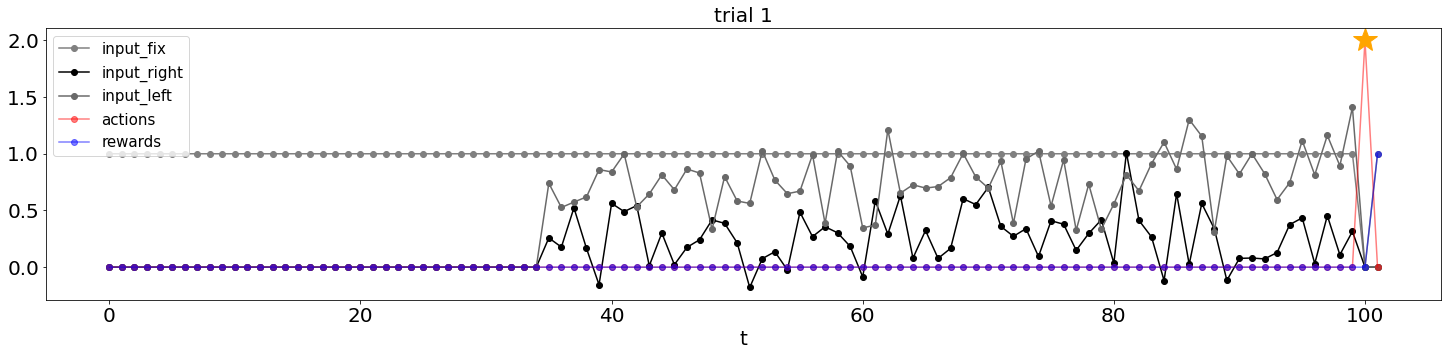

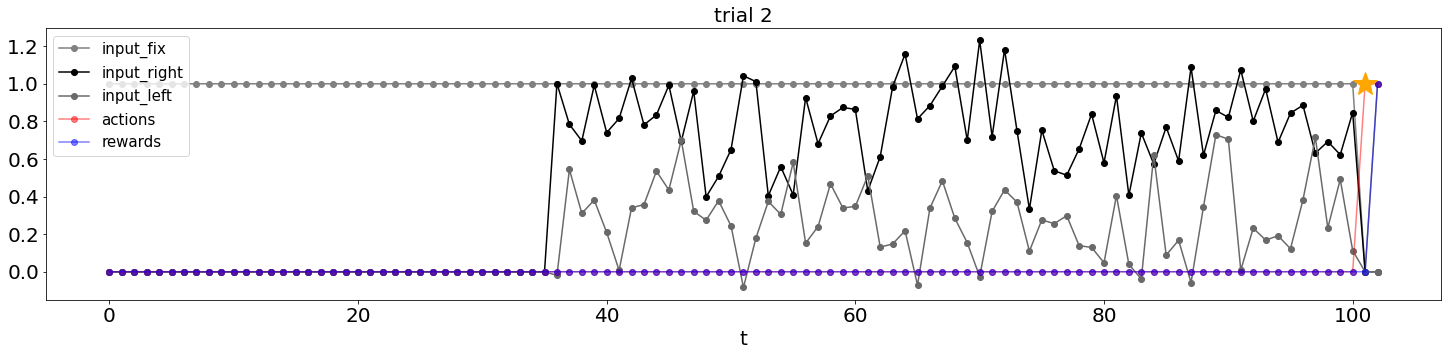

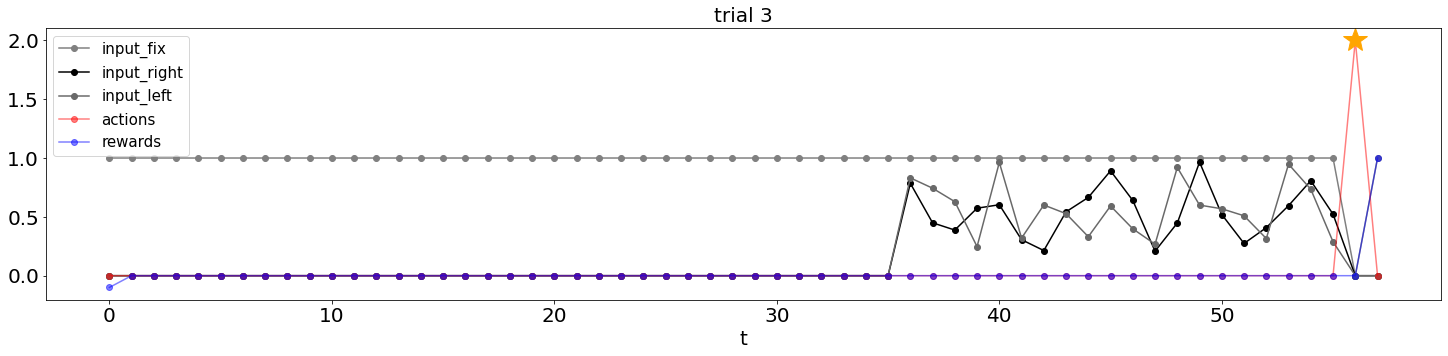

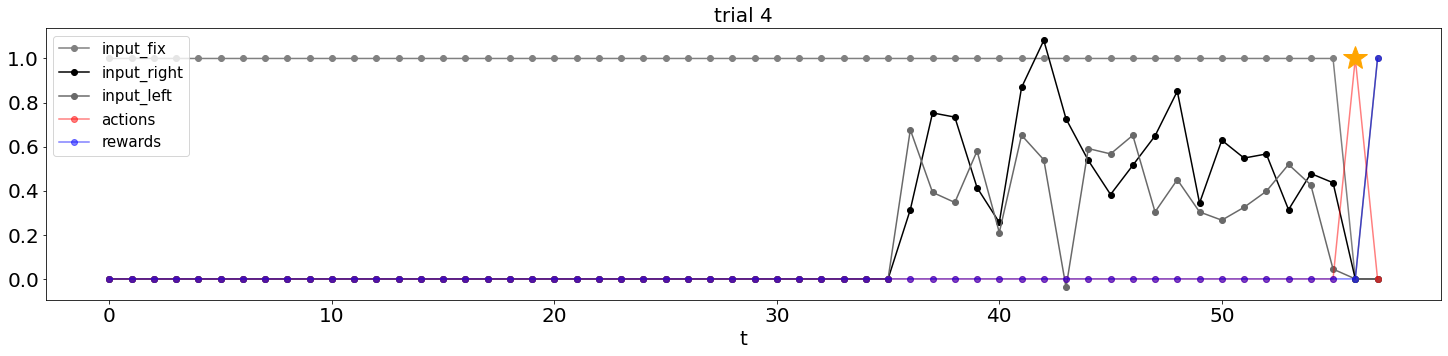

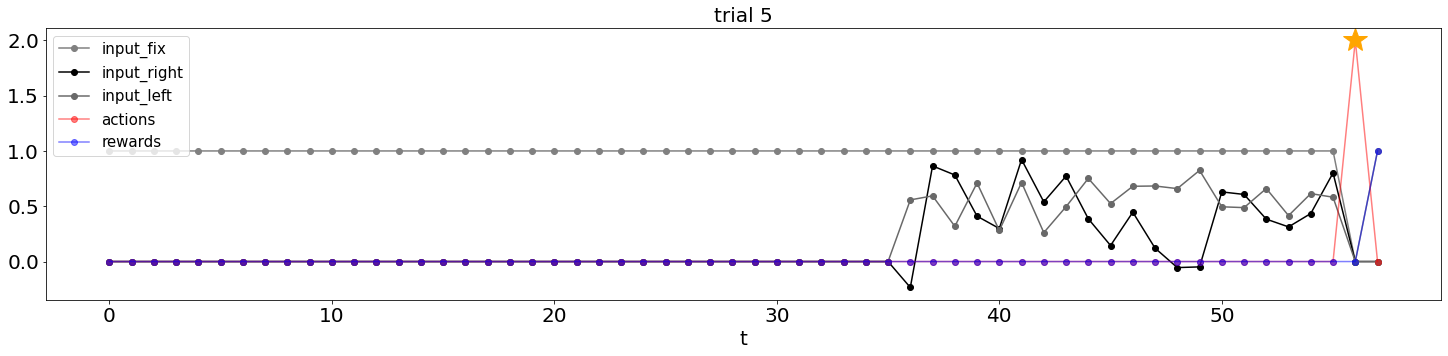

In [15]:
obs = obs.T
length = 0
for i in range(5):

    plt.figure(figsize=(25,5))
    
    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])
     
    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.legend(fontsize=15, loc="upper left");